In [3]:
## Data Augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
xtrain = train_datagen.flow_from_directory('Downloads/Flowers-Dataset/flowers/training',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 2971 images belonging to 5 classes.


In [9]:
xtest = test_datagen.flow_from_directory('Downloads/Flowers-Dataset/flowers/testing',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 1346 images belonging to 5 classes.


In [10]:
##Create Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [12]:
# Creating CNN block

model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
# Fully connected layers (ANN)
model.add(Dense(500,activation='relu')) # Hidden layer 1
model.add(Dense(300,activation='relu')) # Hidden layer 2
model.add(Dense(150,activation='relu')) # Hidden Layer 3
model.add(Dense(5,activation='softmax')) # Output layer

In [13]:
# Compile the model

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
# Train model

model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=50,
                    validation_data=xtest,
                    validation_steps=len(xtest))

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_17336\2559865205.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(xtrain,


Epoch 1/50
30/30 [==============================] - 99s 3s/step - loss: 2.3447 - accuracy: 0.2891 - val_loss: 1.4538 - val_accuracy: 0.3930
Epoch 2/50
30/30 [==============================] - 53s 2s/step - loss: 1.2885 - accuracy: 0.4436 - val_loss: 1.3091 - val_accuracy: 0.4279
Epoch 3/50
30/30 [==============================] - 55s 2s/step - loss: 1.1369 - accuracy: 0.5220 - val_loss: 1.2717 - val_accuracy: 0.4770
Epoch 4/50
30/30 [==============================] - 57s 2s/step - loss: 1.0976 - accuracy: 0.5483 - val_loss: 1.3750 - val_accuracy: 0.4562
Epoch 5/50
30/30 [==============================] - 58s 2s/step - loss: 1.0423 - accuracy: 0.5772 - val_loss: 1.1802 - val_accuracy: 0.5342
Epoch 6/50
30/30 [==============================] - 57s 2s/step - loss: 0.9782 - accuracy: 0.6133 - val_loss: 1.0640 - val_accuracy: 0.5914
Epoch 7/50
30/30 [==============================] - 56s 2s/step - loss: 0.9344 - accuracy: 0.6274 - val_loss: 1.1740 - val_accuracy: 0.5639
Epoch 8/50
30/30 [==

In [15]:
# Saving model

model.save('Flowers.h5')

In [16]:
# Importing req lib

import numpy as np
from tensorflow.keras.preprocessing import image

In [23]:
# Reading the image

img = image.load_img('Downloads/Flowers-Dataset/flowers/testing/daisy/102841525_bd6628ae3c.jpg',target_size=(64,64))

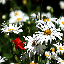

In [24]:
img

In [25]:
# Converting image to array

x = image.img_to_array(img)
x

array([[[180., 178., 157.],
        [203., 204., 190.],
        [201., 205., 180.],
        ...,
        [ 17.,  23.,  21.],
        [ 12.,  18.,  16.],
        [  9.,  13.,  12.]],

       [[200., 199., 179.],
        [187., 188., 190.],
        [190., 195., 189.],
        ...,
        [105., 117., 115.],
        [105., 116., 112.],
        [ 69.,  75.,  73.]],

       [[130., 132., 121.],
        [101., 101.,  99.],
        [152., 154., 149.],
        ...,
        [175., 181., 179.],
        [190., 205., 200.],
        [144., 157., 150.]],

       ...,

       [[213., 228., 225.],
        [246., 248., 247.],
        [236., 240., 239.],
        ...,
        [245., 247., 242.],
        [255., 187.,  31.],
        [239., 185.,  14.]],

       [[187., 198., 184.],
        [ 47.,  61.,  46.],
        [ 15.,  26.,   9.],
        ...,
        [224., 223., 218.],
        [243., 250., 243.],
        [255., 255., 251.]],

       [[ 65.,  80.,  59.],
        [ 44.,  57.,  47.],
        [ 21.,  

In [26]:
# Expanding dimensions

x = np.expand_dims(x,axis=0)
x

array([[[[180., 178., 157.],
         [203., 204., 190.],
         [201., 205., 180.],
         ...,
         [ 17.,  23.,  21.],
         [ 12.,  18.,  16.],
         [  9.,  13.,  12.]],

        [[200., 199., 179.],
         [187., 188., 190.],
         [190., 195., 189.],
         ...,
         [105., 117., 115.],
         [105., 116., 112.],
         [ 69.,  75.,  73.]],

        [[130., 132., 121.],
         [101., 101.,  99.],
         [152., 154., 149.],
         ...,
         [175., 181., 179.],
         [190., 205., 200.],
         [144., 157., 150.]],

        ...,

        [[213., 228., 225.],
         [246., 248., 247.],
         [236., 240., 239.],
         ...,
         [245., 247., 242.],
         [255., 187.,  31.],
         [239., 185.,  14.]],

        [[187., 198., 184.],
         [ 47.,  61.,  46.],
         [ 15.,  26.,   9.],
         ...,
         [224., 223., 218.],
         [243., 250., 243.],
         [255., 255., 251.]],

        [[ 65.,  80.,  59.],
       

In [27]:
# Predicting Flower

model.predict(x)

1/1 [==============================] - 0s 63ms/step


array([[1., 0., 0., 0., 0.]], dtype=float32)

In [28]:
# For visualizing class index

xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [29]:
# Predicting and index matching

op = ['daisy','dabdelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 63ms/step


'daisy'